<a href="https://colab.research.google.com/github/SalamUddin844/A-comparison-of-ensemble-model-and-Self-build-hybrid-model-for-Cataract-detection-using-OCT-Image-/blob/main/Cataract_detection_using_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import random
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, MaxPooling2D
from keras.models import Model
from keras.applications import MobileNetV2,ResNet50,ResNet50V2,InceptionV3,InceptionResNetV2,Xception,VGG16,NASNetMobile
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras.utils as image
import seaborn as sns
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.image as mpimg
from PIL import Image
import shutil
sns.set()
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/DataSet/cataract.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/DataSet/cataract.zip
   creating: cataract/dataset/
   creating: cataract/dataset/test/
   creating: cataract/dataset/test/cataract/
  inflating: cataract/dataset/test/cataract/_0_4015166.jpg  
  inflating: cataract/dataset/test/cataract/_1_5346540.jpg  
  inflating: cataract/dataset/test/cataract/_1_7703314.jpg  
  inflating: cataract/dataset/test/cataract/_10_3215668.jpg  
  inflating: cataract/dataset/test/cataract/_11_7158929.jpg  
  inflating: cataract/dataset/test/cataract/_12_5233869.jpg  
  inflating: cataract/dataset/test/cataract/_13_3987009.jpg  
  inflating: cataract/dataset/test/cataract/_14_7805520.jpg  
  inflating: cataract/dataset/test/cataract/_16_1907643.jpg  
  inflating: cataract/dataset/test/cataract/_16_8423210.jpg  
  inflating: cataract/dataset/test/cataract/_17_1497593.jpg  
  inflating: cataract/dataset/test/cataract/_17_6538881.jpg  
  inflating: cataract/dataset/test/cataract/_18_3816222.jpg  
  inflating: ca

In [ ]:
dir = "cataract/dataset/train"

# **Data Distribution**

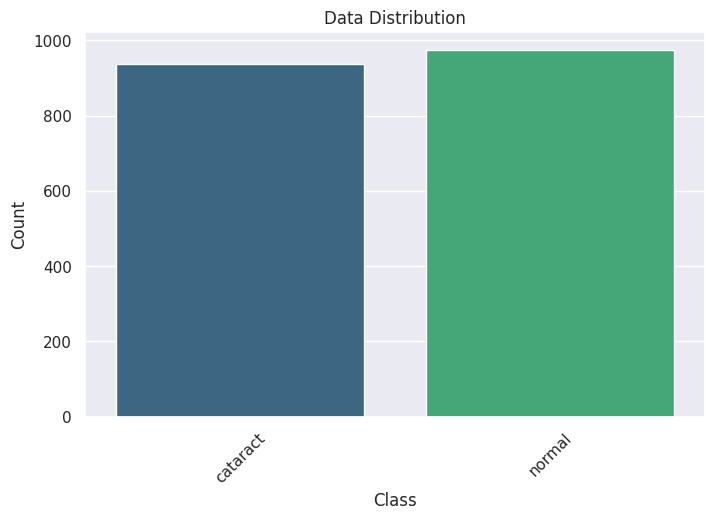

In [ ]:
class_labels = os.listdir(dir)
image_counts = [len(os.listdir(os.path.join(dir, label))) for label in class_labels]
plt.figure(figsize=(8,5))
sns.barplot(x=class_labels, y=image_counts, palette="viridis")
plt.title('Data Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **Creat train Set**


In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,# 0 - 1
    zoom_range=0.2,
    shear_range = 0.1,
    horizontal_flip=True,
    rotation_range=(10),
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5,1.8),

)

In [ ]:

train_generator=train_datagen.flow_from_directory(
    'cataract/dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)
train_generator.class_indices

Found 1912 images belonging to 2 classes.


{'cataract': 0, 'normal': 1}

In [ ]:
print(train_generator.labels)


[0 0 0 ... 1 1 1]


# **Creat Test Set**

In [ ]:

test_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range = 0.1,
    horizontal_flip=True,
    rotation_range=(10),
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5,1.8),

)

In [ ]:

test_generator=train_datagen.flow_from_directory(
    'cataract/dataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,

)
test_generator.class_indices

Found 200 images belonging to 2 classes.


{'cataract': 0, 'normal': 1}

In [ ]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

# **Creat Validation set**

In [ ]:
validation_datagen=ImageDataGenerator(rescale= 1./255)
validation_generator=validation_datagen.flow_from_directory(
    'cataract/dataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
)
validation_generator.class_indices

Found 200 images belonging to 2 classes.


{'cataract': 0, 'normal': 1}

In [ ]:
validation_generator.labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

# **Directory**

# **Train Image Visualization**

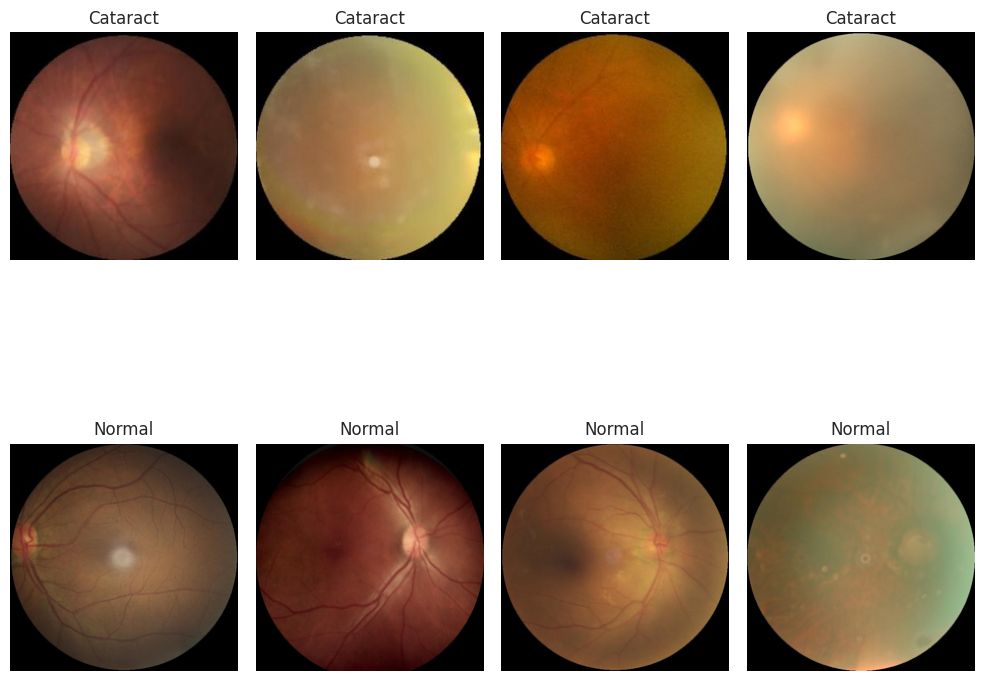

In [ ]:
cataract_image_path = os.path.join(dir, "cataract")
normal_image_path = os.path.join(dir, "normal")
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
class_labels = ["Cataract", "Normal"]

for i, folder in enumerate([cataract_image_path, normal_image_path]):
    images = os.listdir(folder)
    for j in range(4):
        img_path = os.path.join(folder, images[j])
        img = Image.open(img_path)
        img = img.resize((224, 224))
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(class_labels[i])

plt.tight_layout()
plt.show()


# **Model Architecture**

# **VGG16**

In [ ]:
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in vgg.layers:
    layer.trainable=False
x=vgg.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_1=Model(inputs=vgg.input,outputs=prediction)
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

# **Models check point**

In [ ]:
history_1=model_1.fit(train_generator,validation_data=validation_generator,epochs=10,)

Epoch 1/10
60/60 [==============================] - 58s 699ms/step - loss: 0.4090 - accuracy: 0.8039 - val_loss: 0.2693 - val_accuracy: 0.9100
Epoch 2/10
60/60 [==============================] - 39s 637ms/step - loss: 0.2967 - accuracy: 0.8734 - val_loss: 0.2487 - val_accuracy: 0.8950
Epoch 3/10
60/60 [==============================] - 40s 670ms/step - loss: 0.2512 - accuracy: 0.9038 - val_loss: 0.2250 - val_accuracy: 0.9050
Epoch 4/10
60/60 [==============================] - 41s 674ms/step - loss: 0.2337 - accuracy: 0.9106 - val_loss: 0.2122 - val_accuracy: 0.9050
Epoch 5/10
60/60 [==============================] - 41s 683ms/step - loss: 0.2225 - accuracy: 0.9127 - val_loss: 0.3016 - val_accuracy: 0.8800
Epoch 6/10
60/60 [==============================] - 39s 649ms/step - loss: 0.2072 - accuracy: 0.9147 - val_loss: 0.2566 - val_accuracy: 0.8850
Epoch 7/10
60/60 [==============================] - 39s 649ms/step - loss: 0.2056 - accuracy: 0.9168 - val_loss: 0.2243 - val_accuracy: 0.8950



# **Training,Validation Accuracy and Loss Visualization**


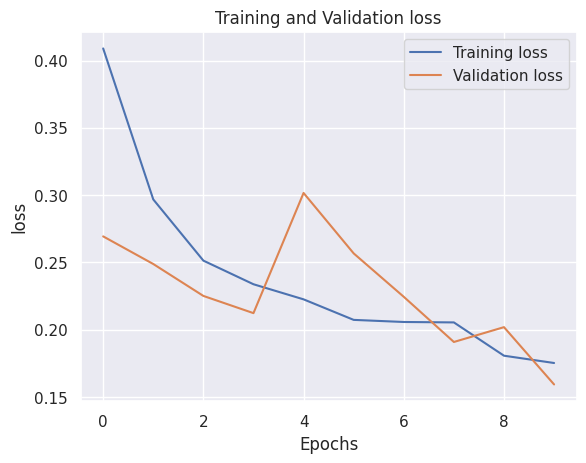

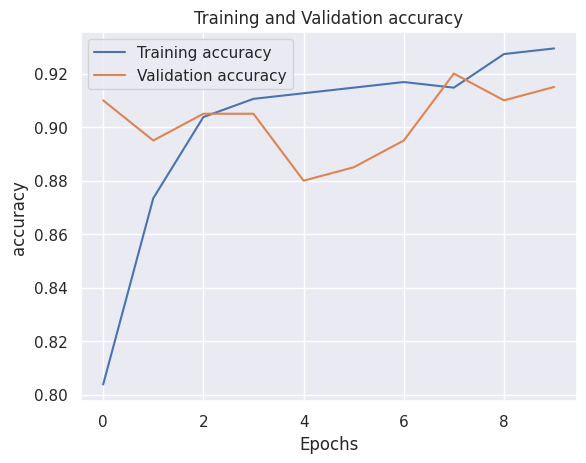

In [ ]:
def plot_metrics(history_1, metric):
    plt.plot(history_1.history[metric], label='Training ' + metric)
    plt.plot(history_1.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_1, 'loss')
plot_metrics(history_1, 'accuracy')


# **Model Save**

In [ ]:
model_1.save("/content/cataract/dataset")
#save model_1

# **Model Evalution**

In [ ]:
train_loss, train_accuracy = model_1.evaluate(train_generator)
validation_loss, validation_accuracy = model_1.evaluate(validation_generator)
test_loss, test_accuracy = model_1.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


7/7 [==============================] - 3s 489ms/step - loss: 0.1850 - accuracy: 0.9200

----------------------------------------
----------------------------------------
Train Loss:          0.1659601628780365
Train Accuracy:      0.9335774183273315

----------------------------------------
----------------------------------------
Validation Loss:     0.1592012345790863
Validation Accuracy: 0.9150000214576721

----------------------------------------
----------------------------------------
Test Loss:           0.18503189086914062
Test Accuracy:       0.9200000166893005


# **Output of Image Prediction**

In [ ]:
img_path = '/content/drive/MyDrive/Colab_Notebooks/DataSet/catarac/dataset/test/cataract/_18_952924.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
plt.imshow(img, cmap='gray')
plt.show()

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.
pred = model_1.predict(img)
if pred < 0.5:
    print("Cataract")
else:
    print("Normal")


In [ ]:
img_path = '/content/drive/MyDrive/Colab_Notebooks/DataSet/catarac/dataset/test/normal/1034_right.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
plt.imshow(img, cmap='gray')
plt.show()

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.
pred = model_1.predict(img)
if pred < 0.5:
    print("Cataract")
else:
    print("Normal")



# **MobileNetV2**

In [ ]:

mobilev2=MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in mobilev2.layers:
    layer.trainable=False
x=mobilev2.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_2=Model(inputs=mobilev2.input,outputs=prediction)
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

In [ ]:
history_2=model_2.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 42s 613ms/step - loss: 0.5019 - accuracy: 0.8593 - val_loss: 0.3152 - val_accuracy: 0.9300
Epoch 2/10
60/60 [==============================] - 37s 613ms/step - loss: 0.1693 - accuracy: 0.9414 - val_loss: 0.1289 - val_accuracy: 0.9750
Epoch 3/10
60/60 [==============================] - 37s 620ms/step - loss: 0.1551 - accuracy: 0.9435 - val_loss: 0.1208 - val_accuracy: 0.9550
Epoch 4/10
60/60 [==============================] - 38s 639ms/step - loss: 0.1522 - accuracy: 0.9493 - val_loss: 0.1348 - val_accuracy: 0.9650
Epoch 5/10
60/60 [==============================] - 38s 633ms/step - loss: 0.1371 - accuracy: 0.9493 - val_loss: 0.1403 - val_accuracy: 0.9650
Epoch 6/10
60/60 [==============================] - 37s 623ms/step - loss: 0.1378 - accuracy: 0.9487 - val_loss: 0.1564 - val_accuracy: 0.9600
Epoch 7/10
60/60 [==============================] - 37s 620ms/step - loss: 0.1275 - accuracy: 0.9555 - val_loss: 0.1060 - val_accuracy: 0.9600

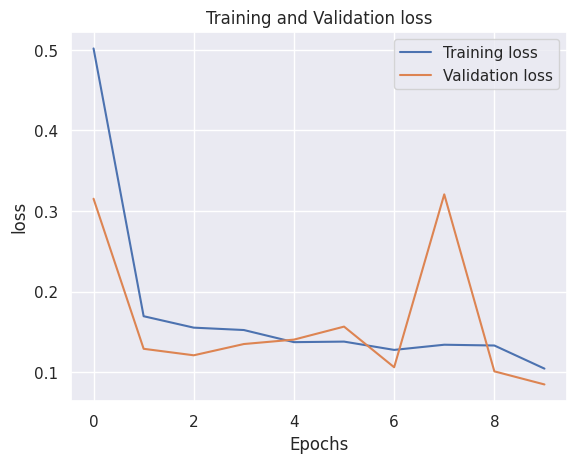

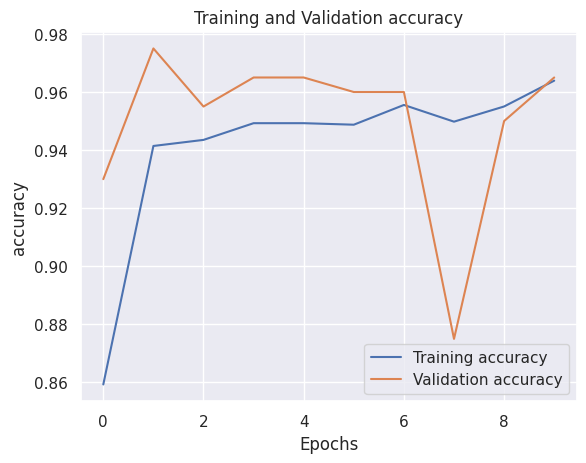

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history_2.history[metric], label='Training ' + metric)
    plt.plot(history_2.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_2, 'loss')
plot_metrics(history_2, 'accuracy')


In [ ]:
model_2.save("/content/cataract/dataset")
#save model_2

In [ ]:
train_loss, train_accuracy = model_2.evaluate(train_generator)
validation_loss, validation_accuracy = model_2.evaluate(validation_generator)
test_loss, test_accuracy = model_2.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


# **InceptionV3**

In [ ]:

inspv3=InceptionV3(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in inspv3.layers:
    layer.trainable=False
x=inspv3.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_3=Model(inputs=inspv3.input,outputs=prediction)
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d_2[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

In [ ]:
history_3=model_3.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 49s 686ms/step - loss: 0.4218 - accuracy: 0.8651 - val_loss: 0.2417 - val_accuracy: 0.9000
Epoch 2/10
60/60 [==============================] - 38s 638ms/step - loss: 0.1938 - accuracy: 0.9210 - val_loss: 0.1327 - val_accuracy: 0.9500
Epoch 3/10
60/60 [==============================] - 41s 682ms/step - loss: 0.1905 - accuracy: 0.9247 - val_loss: 0.1599 - val_accuracy: 0.9300
Epoch 4/10
60/60 [==============================] - 38s 641ms/step - loss: 0.1900 - accuracy: 0.9320 - val_loss: 0.1525 - val_accuracy: 0.9350
Epoch 5/10
60/60 [==============================] - 38s 641ms/step - loss: 0.1746 - accuracy: 0.9399 - val_loss: 0.1331 - val_accuracy: 0.9400
Epoch 6/10
60/60 [==============================] - 39s 649ms/step - loss: 0.1657 - accuracy: 0.9346 - val_loss: 0.1214 - val_accuracy: 0.9500
Epoch 7/10
60/60 [==============================] - 38s 638ms/step - loss: 0.1636 - accuracy: 0.9456 - val_loss: 0.1518 - val_accuracy: 0.9350

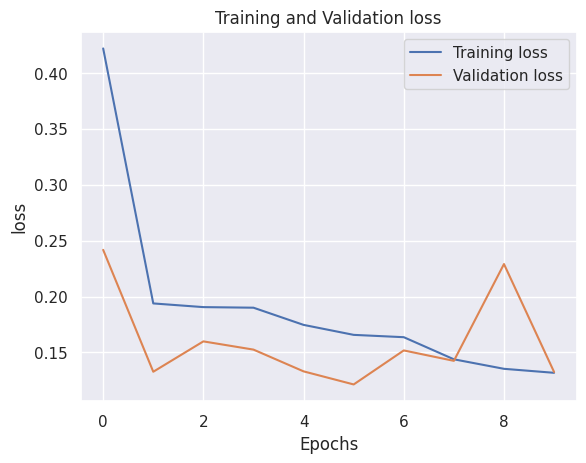

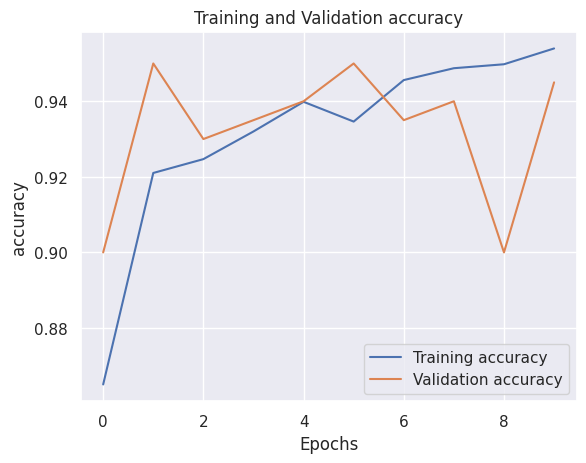

In [ ]:
def plot_metrics(history_3, metric):
    plt.plot(history_3.history[metric], label='Training ' + metric)
    plt.plot(history_3.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_3, 'loss')
plot_metrics(history_3, 'accuracy')


In [ ]:
model_3.save("/content/cataract/dataset")
#save model_3

In [ ]:
train_loss, train_accuracy = model_3.evaluate(train_generator)
validation_loss, validation_accuracy = model_3.evaluate(validation_generator)
test_loss, test_accuracy = model_3.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


# **InceptionResNetV2**

In [ ]:


incpv2=InceptionResNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in incpv2.layers:
    layer.trainable=False
x=incpv2.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_4=Model(inputs=incpv2.input,outputs=prediction)
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.summary()

In [ ]:
history_4=model_4.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 60s 733ms/step - loss: 0.4423 - accuracy: 0.8515 - val_loss: 0.2454 - val_accuracy: 0.9100
Epoch 2/10
60/60 [==============================] - 41s 677ms/step - loss: 0.2503 - accuracy: 0.8949 - val_loss: 0.2970 - val_accuracy: 0.8800
Epoch 3/10
60/60 [==============================] - 41s 676ms/step - loss: 0.2294 - accuracy: 0.9111 - val_loss: 0.2280 - val_accuracy: 0.9350
Epoch 4/10
60/60 [==============================] - 43s 704ms/step - loss: 0.2203 - accuracy: 0.9236 - val_loss: 0.3134 - val_accuracy: 0.8900
Epoch 5/10
60/60 [==============================] - 41s 674ms/step - loss: 0.1813 - accuracy: 0.9372 - val_loss: 0.1525 - val_accuracy: 0.9400
Epoch 6/10
60/60 [==============================] - 40s 674ms/step - loss: 0.1751 - accuracy: 0.9372 - val_loss: 0.1982 - val_accuracy: 0.9250
Epoch 7/10
60/60 [==============================] - 41s 682ms/step - loss: 0.1743 - accuracy: 0.9435 - val_loss: 0.2282 - val_accuracy: 0.9050

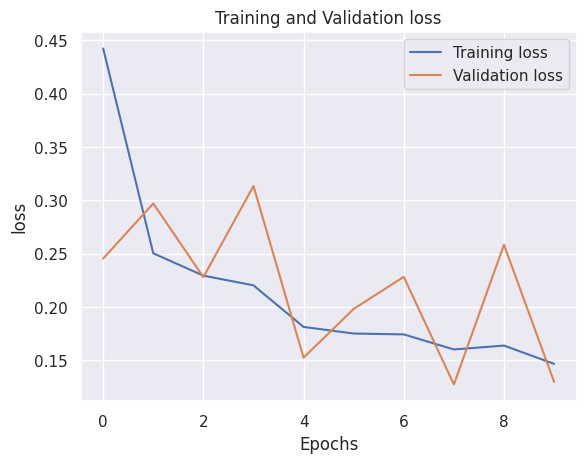

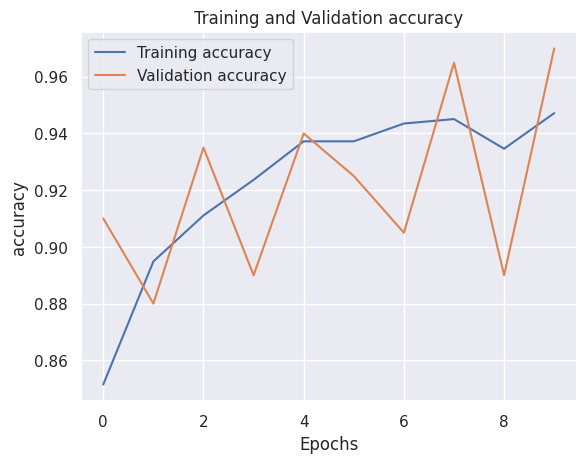

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history_4.history[metric], label='Training ' + metric)
    plt.plot(history_4.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_4, 'loss')
plot_metrics(history_4, 'accuracy')


In [ ]:
model_4.save("/content/cataract/dataset")
#save model_4

In [ ]:
train_loss, train_accuracy = model_4.evaluate(train_generator)
validation_loss, validation_accuracy = model_4.evaluate(validation_generator)
test_loss, test_accuracy = model_4.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


7/7 [==============================] - 3s 411ms/step - loss: 0.2401 - accuracy: 0.9300

----------------------------------------
----------------------------------------
Train Loss:          0.15851546823978424
Train Accuracy:      0.9414225816726685

----------------------------------------
----------------------------------------
Validation Loss:     0.12988002598285675
Validation Accuracy: 0.9700000286102295

----------------------------------------
----------------------------------------
Test Loss:           0.24014663696289062
Test Accuracy:       0.9300000071525574


# **Xception**

In [ ]:


xcp=Xception(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in xcp.layers:
    layer.trainable=False
x=xcp.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_5=Model(inputs=xcp.input,outputs=prediction)
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_5.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati

In [ ]:
history_5=model_5.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 46s 678ms/step - loss: 0.3780 - accuracy: 0.8698 - val_loss: 0.3560 - val_accuracy: 0.9150
Epoch 2/10
60/60 [==============================] - 40s 658ms/step - loss: 0.1978 - accuracy: 0.9247 - val_loss: 0.2540 - val_accuracy: 0.9100
Epoch 3/10
60/60 [==============================] - 40s 659ms/step - loss: 0.1703 - accuracy: 0.9362 - val_loss: 0.2909 - val_accuracy: 0.9250
Epoch 4/10
60/60 [==============================] - 42s 699ms/step - loss: 0.1471 - accuracy: 0.9430 - val_loss: 0.1621 - val_accuracy: 0.9450
Epoch 5/10
60/60 [==============================] - 40s 662ms/step - loss: 0.1505 - accuracy: 0.9498 - val_loss: 0.3018 - val_accuracy: 0.9100
Epoch 6/10
60/60 [==============================] - 39s 657ms/step - loss: 0.1491 - accuracy: 0.9545 - val_loss: 0.1947 - val_accuracy: 0.9350
Epoch 7/10
60/60 [==============================] - 40s 658ms/step - loss: 0.1345 - accuracy: 0.9508 - val_loss: 0.1675 - val_accuracy: 0.9450

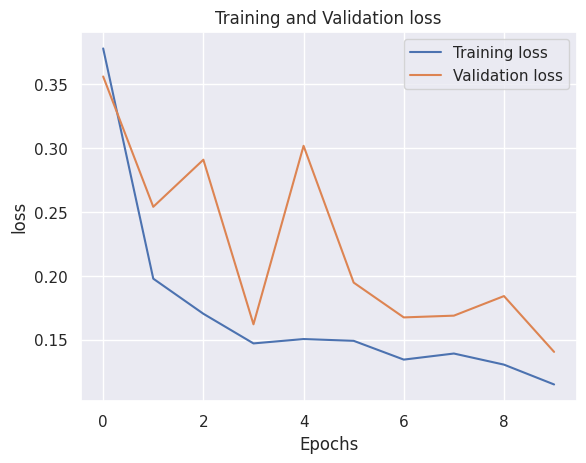

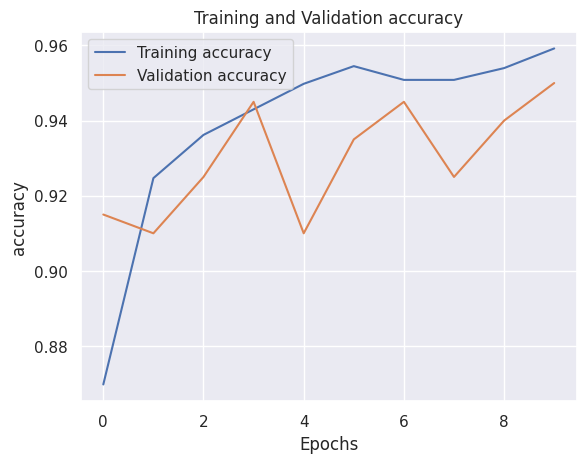

In [ ]:
def plot_metrics(history_5, metric):
    plt.plot(history_5.history[metric], label='Training ' + metric)
    plt.plot(history_5.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_5, 'loss')
plot_metrics(history_5, 'accuracy')


In [ ]:
model_5.save("/content/cataract/dataset")
#save model_5

In [ ]:
train_loss, train_accuracy = model_5.evaluate(train_generator)
validation_loss, validation_accuracy = model_5.evaluate(validation_generator)
test_loss, test_accuracy = model_5.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


7/7 [==============================] - 3s 394ms/step - loss: 0.1253 - accuracy: 0.9650

----------------------------------------
----------------------------------------
Train Loss:          0.11154111474752426
Train Accuracy:      0.9581589698791504

----------------------------------------
----------------------------------------
Validation Loss:     0.14049886167049408
Validation Accuracy: 0.949999988079071

----------------------------------------
----------------------------------------
Test Loss:           0.12531663477420807
Test Accuracy:       0.9649999737739563


# **DenseNet169**

In [ ]:


from keras.applications.densenet import DenseNet169
dn69=DenseNet169(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in dn69.layers:
    layer.trainable=False
x=dn69.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_6=Model(inputs=dn69.input,outputs=prediction)
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_6.summary()

51877672/51877672 [==============================] - 0s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_6[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati

In [ ]:
history_6=model_6.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 60s 752ms/step - loss: 0.3397 - accuracy: 0.8881 - val_loss: 0.1567 - val_accuracy: 0.9150
Epoch 2/10
60/60 [==============================] - 39s 655ms/step - loss: 0.1648 - accuracy: 0.9388 - val_loss: 0.1671 - val_accuracy: 0.9250
Epoch 3/10
60/60 [==============================] - 40s 658ms/step - loss: 0.1542 - accuracy: 0.9451 - val_loss: 0.1432 - val_accuracy: 0.9250
Epoch 4/10
60/60 [==============================] - 42s 694ms/step - loss: 0.1399 - accuracy: 0.9482 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 5/10
60/60 [==============================] - 39s 652ms/step - loss: 0.1236 - accuracy: 0.9555 - val_loss: 0.0627 - val_accuracy: 0.9650
Epoch 6/10
60/60 [==============================] - 40s 660ms/step - loss: 0.1112 - accuracy: 0.9597 - val_loss: 0.0484 - val_accuracy: 0.9700
Epoch 7/10
60/60 [==============================] - 39s 647ms/step - loss: 0.1081 - accuracy: 0.9603 - val_loss: 0.0473 - val_accuracy: 0.9800

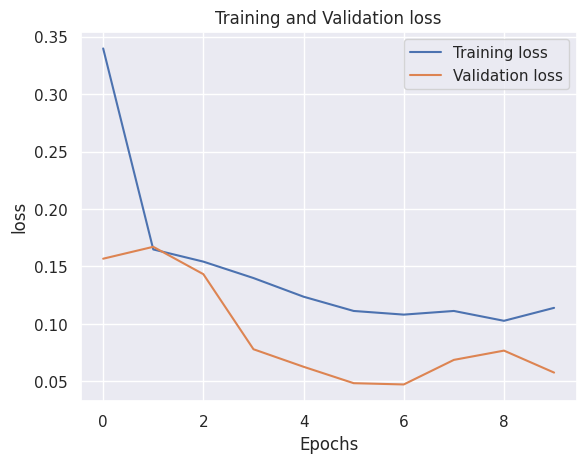

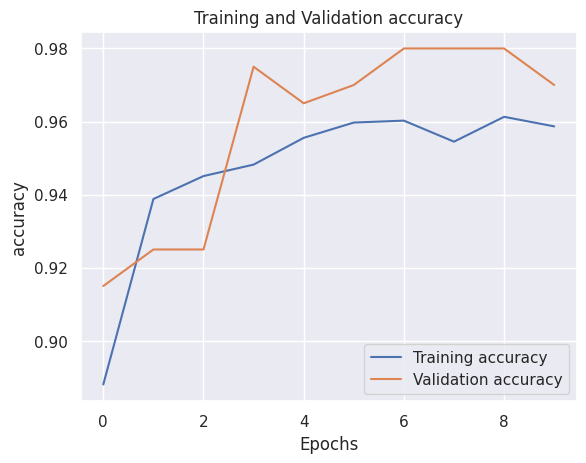

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history_6.history[metric], label='Training ' + metric)
    plt.plot(history_6.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_6, 'loss')
plot_metrics(history_6, 'accuracy')



In [ ]:
model_6.save("/content/cataract/dataset")
#save model_6

In [ ]:
train_loss, train_accuracy = model_6.evaluate(train_generator)
validation_loss, validation_accuracy = model_6.evaluate(validation_generator)
test_loss, test_accuracy = model_6.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


7/7 [==============================] - 3s 386ms/step - loss: 0.0880 - accuracy: 0.9700

----------------------------------------
----------------------------------------
Train Loss:          0.08883317559957504
Train Accuracy:      0.9665272235870361

----------------------------------------
----------------------------------------
Validation Loss:     0.057617444545030594
Validation Accuracy: 0.9700000286102295

----------------------------------------
----------------------------------------
Test Loss:           0.0879603773355484
Test Accuracy:       0.9700000286102295


# **DenseNet121**

In [ ]:


from keras.applications.densenet import DenseNet121
dens21=DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in dens21.layers:
    layer.trainable=False
x=dens21.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_7=Model(inputs=dens21.input,outputs=prediction)
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_7.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_7[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati

In [ ]:
history_7=model_7.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 49s 665ms/step - loss: 0.3176 - accuracy: 0.8902 - val_loss: 0.1591 - val_accuracy: 0.9450
Epoch 2/10
60/60 [==============================] - 39s 646ms/step - loss: 0.1686 - accuracy: 0.9378 - val_loss: 0.1461 - val_accuracy: 0.9400
Epoch 3/10
60/60 [==============================] - 39s 648ms/step - loss: 0.1398 - accuracy: 0.9461 - val_loss: 0.0567 - val_accuracy: 0.9700
Epoch 4/10
60/60 [==============================] - 38s 639ms/step - loss: 0.1507 - accuracy: 0.9482 - val_loss: 0.0716 - val_accuracy: 0.9700
Epoch 5/10
60/60 [==============================] - 38s 635ms/step - loss: 0.1331 - accuracy: 0.9498 - val_loss: 0.0658 - val_accuracy: 0.9650
Epoch 6/10
60/60 [==============================] - 38s 641ms/step - loss: 0.1358 - accuracy: 0.9519 - val_loss: 0.0651 - val_accuracy: 0.9700
Epoch 7/10
60/60 [==============================] - 40s 666ms/step - loss: 0.1250 - accuracy: 0.9561 - val_loss: 0.0655 - val_accuracy: 0.9650

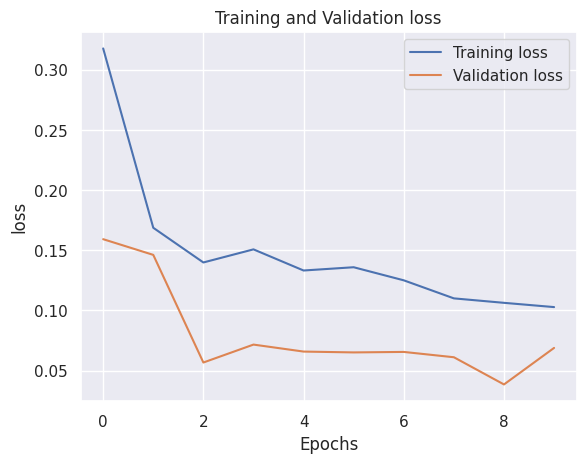

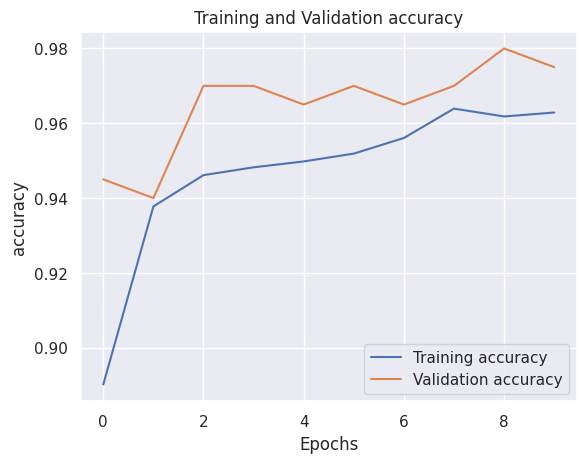

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history_7.history[metric], label='Training ' + metric)
    plt.plot(history_7.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_7, 'loss')
plot_metrics(history_7, 'accuracy')



In [ ]:
model_7.save("/content/cataract/dataset")
#save model_7

In [ ]:
train_loss, train_accuracy = model_7.evaluate(train_generator)
validation_loss, validation_accuracy = model_7.evaluate(validation_generator)
test_loss, test_accuracy = model_7.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


7/7 [==============================] - 3s 384ms/step - loss: 0.1021 - accuracy: 0.9600

----------------------------------------
----------------------------------------
Train Loss:          0.10329698026180267
Train Accuracy:      0.9618200659751892

----------------------------------------
----------------------------------------
Validation Loss:     0.06880641728639603
Validation Accuracy: 0.9750000238418579

----------------------------------------
----------------------------------------
Test Loss:           0.1021401509642601
Test Accuracy:       0.9599999785423279


# **NASNetMobile**

In [ ]:

nasa=NASNetMobile(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in nasa.layers:
    layer.trainable=False
x=nasa.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_8=Model(inputs=nasa.input,outputs=prediction)
model_8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_8.summary()

19993432/19993432 [==============================] - 0s 0us/step
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_8[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_297 (Activation

In [ ]:
history_8=model_8.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
60/60 [==============================] - 63s 698ms/step - loss: 0.6734 - accuracy: 0.8232 - val_loss: 0.1237 - val_accuracy: 0.9400
Epoch 2/10
60/60 [==============================] - 39s 646ms/step - loss: 0.1965 - accuracy: 0.9310 - val_loss: 0.1168 - val_accuracy: 0.9600
Epoch 3/10
60/60 [==============================] - 38s 636ms/step - loss: 0.1770 - accuracy: 0.9320 - val_loss: 0.1084 - val_accuracy: 0.9550
Epoch 4/10
60/60 [==============================] - 38s 643ms/step - loss: 0.1492 - accuracy: 0.9425 - val_loss: 0.1171 - val_accuracy: 0.9500
Epoch 5/10
60/60 [==============================] - 39s 644ms/step - loss: 0.1467 - accuracy: 0.9467 - val_loss: 0.1383 - val_accuracy: 0.9450
Epoch 6/10
60/60 [==============================] - 38s 640ms/step - loss: 0.1474 - accuracy: 0.9461 - val_loss: 0.1077 - val_accuracy: 0.9500
Epoch 7/10
60/60 [==============================] - 41s 679ms/step - loss: 0.1591 - accuracy: 0.9399 - val_loss: 0.0896 - val_accuracy: 0.9600

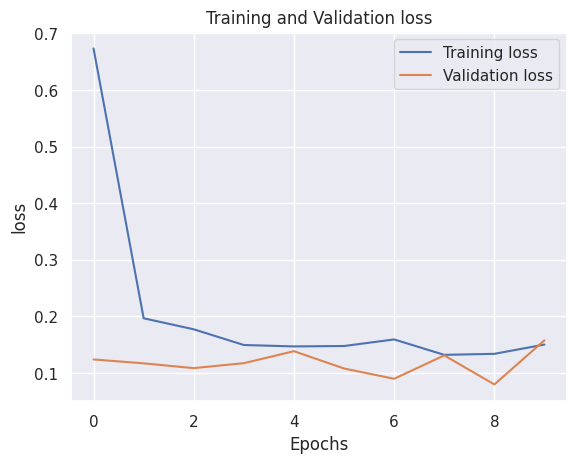

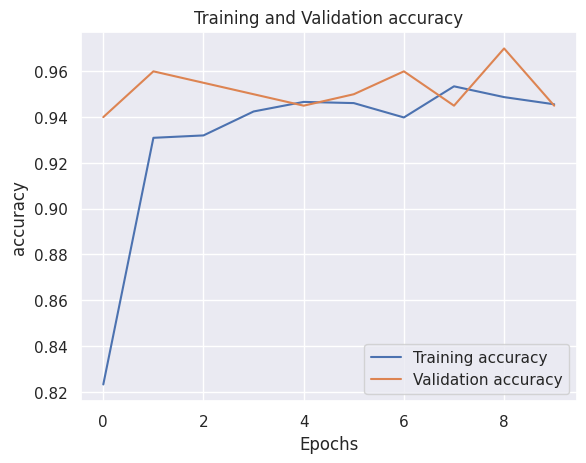

In [ ]:
def plot_metrics(history_8, metric):
    plt.plot(history_8.history[metric], label='Training ' + metric)
    plt.plot(history_8.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric)
    plt.legend()
    plt.show()
plot_metrics(history_8, 'loss')
plot_metrics(history_8, 'accuracy')



In [ ]:
model_8.save("/content/cataract/dataset")
#save model_8

In [ ]:
train_loss, train_accuracy = model_8.evaluate(train_generator)
validation_loss, validation_accuracy = model_8.evaluate(validation_generator)
test_loss, test_accuracy = model_8.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


7/7 [==============================] - 3s 375ms/step - loss: 0.1442 - accuracy: 0.9450

----------------------------------------
----------------------------------------
Train Loss:          0.1355348378419876
Train Accuracy:      0.9518828392028809

----------------------------------------
----------------------------------------
Validation Loss:     0.15753906965255737
Validation Accuracy: 0.9449999928474426

----------------------------------------
----------------------------------------
Test Loss:           0.14416444301605225
Test Accuracy:       0.9449999928474426


# **Ensemble Prediction using Boosting (AdaBoost)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Initialize the TF-IDF vectorizer

# Define the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)

# Train the Random Forest Classifier on your training data
rfc.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rfc.predict(x_test_tfidf)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: " + str(accuracy))
print(report)


NameError: ignored

# **Auto Encoder**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define Autoencoder
def build_autoencoder(input_shape):
    # Encoder
    input_layer = Input(shape=input_shape)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2,2), padding='same')(x)

    # Decoder
    x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = UpSampling2D((2,2))(x)
    decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)  # Assuming RGB images

    return Model(input_layer, decoded)

# Set input shape based on your image dimensions
input_shape = (224, 224, 3)  # Adjust according to your images

# Build Autoencoder
autoencoder = build_autoencoder(input_shape)

# Compile Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print Model Summary
autoencoder.summary()
